In [47]:
from pyimagesearch.transform import four_point_transform
from skimage.filters import threshold_local

In [48]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

def display_img(im):
    fig, ax= plt.subplots(1, figsize=(6,8))    
    ax.imshow(im, cmap='gray')   

def show_img(img):
    cv2.imshow('Scanned_image', imutils.resize(img, height=650))
    cv2.waitKey(0)
    

In [49]:
image= cv2.imread('images/receipt.jpg')
ratio= image.shape[0]/ 500.0

orig= image.copy()

image= imutils.resize(image, height=500)
# image= cv2.resize(image,(0,0), image,.2,.2)

In [50]:
# cv2.imshow('k', image[125:375,125:300])
# cv2.waitKey(0)

In [62]:
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gr_blur= cv2.GaussianBlur(image,(5,5),0 )
edged= cv2.Canny(gr_blur, 75, 200 )
# show_img(edged)


# cv2.imshow('j',image)
# cv2.imshow('k',edged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [52]:
cnts= cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts= imutils.grab_contours(cnts)
cnts= sorted(cnts, key= cv2.contourArea, reverse=True)[:5]

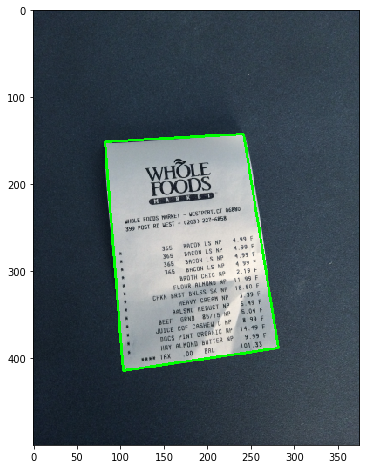

In [53]:
for c in cnts:
    
    peri= cv2.arcLength(c,True)
    approx= cv2.approxPolyDP(c, 0.02*peri, True)
    
    if len(approx)==4:
        screenRnt= approx
        break
       
cv2.drawContours(image, [screenRnt], -1, (0,255,0), 2)
# cv2.imshow('d',image)
cv2.waitKey(0)
display_img(image)

In [54]:
warped= four_point_transform(orig, screenRnt.reshape(4,2)*ratio )

warped= cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T= threshold_local(warped, 11, offset=10, method='gaussian')

warped= (warped>T).astype('uint8')* 255

warped_black= (T>warped).astype('uint8')* 255 # This will produce a black background with white fonts


In [55]:
warped 

array([[255,   0,   0, ...,   0, 255, 255],
       [255,   0,   0, ..., 255, 255, 255],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [56]:
T

array([[ 40.19960041,  50.07052484,  69.87032791, ...,  56.51068247,
         60.21824015,  62.91193543],
       [ 40.76579598,  50.9308823 ,  71.05271428, ...,  64.76458785,
         68.19072986,  70.59167248],
       [ 41.54723024,  52.21470745,  72.89284916, ...,  81.81164848,
         84.64180319,  86.51507725],
       ...,
       [150.84912131, 152.02748826, 153.71700534, ..., 174.39197712,
        174.08432352, 173.90847028],
       [151.43416968, 152.51588034, 154.05384692, ..., 174.67001294,
        174.18887326, 173.89856716],
       [151.84475568, 152.85679888, 154.28742803, ..., 174.80567145,
        174.22212875, 173.86455216]])

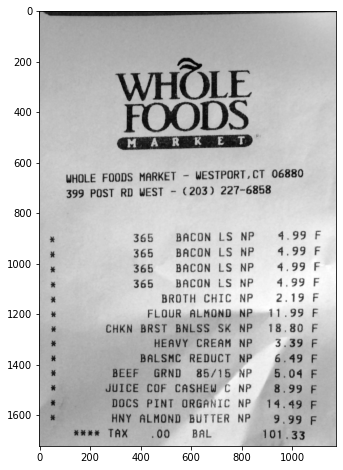

In [57]:
display_img(T)

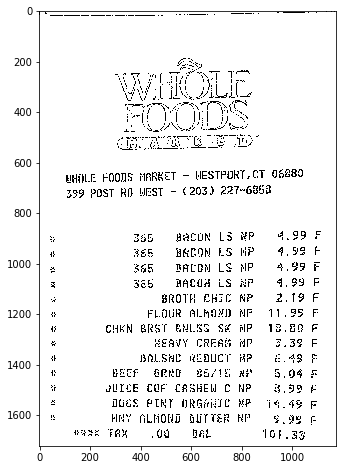

In [58]:
display_img(warped)

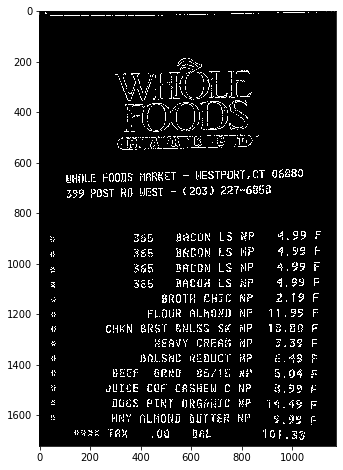

In [59]:
display_img(warped_black)

In [60]:
show_img(warped)

In [61]:
show_img(warped_black)